# <font color ='red'> Tarea
Generar valores aleatorios para la siguiente distribución de probabilidad
    $$f(x)=\begin{cases}\frac{2}{(c-a)(b-a)}(x-a), & a\leq x \leq b\\ \frac{-2}{(c-a)(c-b)}(x-c),& b\leq x \leq c \end{cases}$$ con a=1; b=2; c=5
1. Usando el método de la transformada inversa.
2. Usando el método de aceptación y rechazo.
3. En la librería `import scipy.stats as st` hay una función que genera variables aleatorias triangulares `st.triang.pdf(x, c, loc, scale)` donde "c,loc,scale" son los parámetros de esta distribución (similares a los que  nuestra función se llaman a,b,c, PERO NO IGUALES). Explorar el help de python para encontrar la equivalencia entre los parámetros "c,loc,scale" y los parámetros de nuestra función con parámetros "a,b,c". La solución esperada es como se muestra a continuación:
![imagen.png](attachment:imagen.png)

4. Generar 1000 variables aleatorias usando la función creada en el punto 2 y usando la función `st.triang.rvs` y graficar el histograma en dos gráficas diferentes de cada uno de los conjuntos de variables aleatorios creado. Se espera algo como esto:


In [1]:
# Importamos librerías a trabajar en todas las simulaciones
import matplotlib.pyplot as plt
import numpy as np
from itertools import cycle  # Librería para hacer ciclos
import scipy.stats as st     # Librería estadística
from math import factorial as fac # Importo la operación factorial

%matplotlib inline

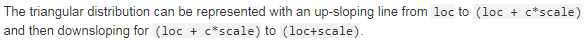
De esta manera sabemos que:
>$$a=loc$$

y:
>$$c=loc+scale$$
>$$c=a+scale$$
>$$scale=c-a$$

por ultimo
>$$b=loc+k*scale$$
>$$b=a+k*(c-a)$$
>$$k=\frac{(b-a)}{(c-a)}$$

Dandonos los parametros
$loc=a$  ;  $loc+k*scale=b$  ;   $loc+scale=c$

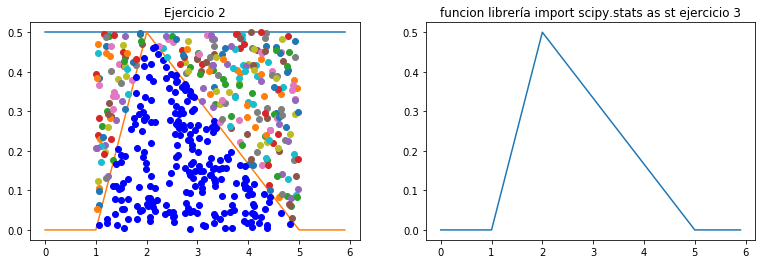

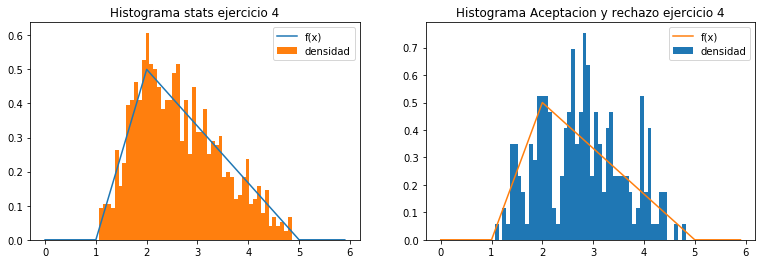

In [155]:
N = 500 # número de puntos a simular
# Función objetivo 
def f(y,x,a,b,c):
    if(x>=a and x<=b):
        y.append(2/((c-a)*(b-a))*(x-a))
    elif(x>b and x<=5):
        y.append(-2/((c-a)*(c-b))*(x-c))
    else:
        y.append(0)
    return y

y=[]

# Máximo de la función f
max_f = .5
# Función t -> Función constante
t = lambda x: max_f*np.ones(len(x)) # función constante
x = np.arange(0,6,0.1);a=1;b=2;c=5;
z=list(map(lambda x:f(y,x,a,b,c),x))

plt.figure(1,figsize=[13,4])
plt.subplot(121)
plt.plot(x,t(x),label='t(x)')
plt.plot(x,y,label='f(x)')
R2 = np.random.rand(N)
R1 = np.random.uniform(1,5,N)
f_x=[]
z = list(map(lambda x:f(f_x,x,a,b,c),R1))
t_x = t(R1)
condition = np.multiply(R2,t_x)<=f_x
for i in range(len(R1)):
    if condition[i]:
        plt.plot(R1[i],R2[i]*t_x[i],'ob')
    else:
        plt.plot(R1[i],R2[i]*t_x[i],'o')

plt.title('Ejercicio 2')

plt.subplot(122)
plt.plot(x,y,label='f(x)')
plt.title('funcion librería import scipy.stats as st ejercicio 3')
plt.show()

plt.figure(2,figsize=[13,4])
plt.subplot(121)
r=st.triang.rvs((b-a)/(c-a),a,c-a,1000)
plt.plot(x,y,label='f(x)')
plt.hist(r,50,density=True,label='densidad')
plt.title('Histograma stats ejercicio 4')
plt.legend()
plt.subplot(122)
temp=[]
for i in range(len(R1)):
    if condition[i]:
        temp.append(R1[i])
plt.hist(temp,50,density=True,label='densidad')
plt.plot(x,y,label='f(x)')
plt.title('Histograma Aceptacion y rechazo ejercicio 4')
plt.legend()
plt.show()




In [ ]:
def fI(y,x,a,b,c):
    if(x>=0 and x<=.5):
        y.append(2*(x*(c-a)*(b-a)+1))
    elif(x>.5 and x<=1):
        y.append(-2*(x*(c-a)*(c-b)+5))
    else:
        y.append(0)
    return y